# Lichess Analysis

This is my first R notebook here, and the point of this is for me to get used to R by running through some data analysis using R, and maybe run some models.

I am not claiming this work as my own -- I am using the work of others to learn. 

Resources used include:    
- https://www.kaggle.com/ashishkumarkorukonda/exploratory-data-analysis-using-r

I may make modifications to the work I am learing from in a effort to help me understand.

In [5]:
# install.packages("tidyverse")
# install.packages("dplyr")
# install.packages("tidyr")
# install.packages("ggplot2")

In [6]:
# Import libraries/packages
library(tidyverse)
library(dplyr)
library(tidyr)
library(ggplot2)

print("All Imported")

[1] "All Imported"


In [38]:
path = "/home/sofithcheallaigh/Projects/R Projects/EDA/Lichess/Data"

In [39]:
x<-paste(path,"games.csv",sep="/")
print(x)

[1] "/home/sofithcheallaigh/Projects/R Projects/EDA/Lichess/Data/games.csv"


In [40]:
files = list.files(x)
print(files)

character(0)


In [42]:
# data <- read.csv("/home/sofithcheallaigh/Projects/R Projects/EDA/Lichess/Data/games.csv")
data <- read.csv(x)

In [45]:
head(data,2)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
1,TZJHLljE,FALSE,1.50421e+12,1.50421e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5 Bf4,D10,Slav Defense: Exchange Variation,5
2,l1NXvwaE,TRUE,1.50413e+12,1.50413e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6 Qe5+ Nxe5 c4 Bb4+,B00,Nimzowitsch Defense: Kennedy Variation,4


We can see there are a number of heading for each column. Some of the more interesting are: `turns`, `victory_status`, `winner` as well as `white_rating` and `black_rating` and the `opening_name`.

Players on `Lichess` can play both rated and unrated games. To be clear, the outcome of a rated game will impact a players rating, the outcome of an unrated game will not.

How do these breakdown in terms of game numbers?

ERROR: Error in +ylab(label = "Frequency"): invalid argument to unary operator


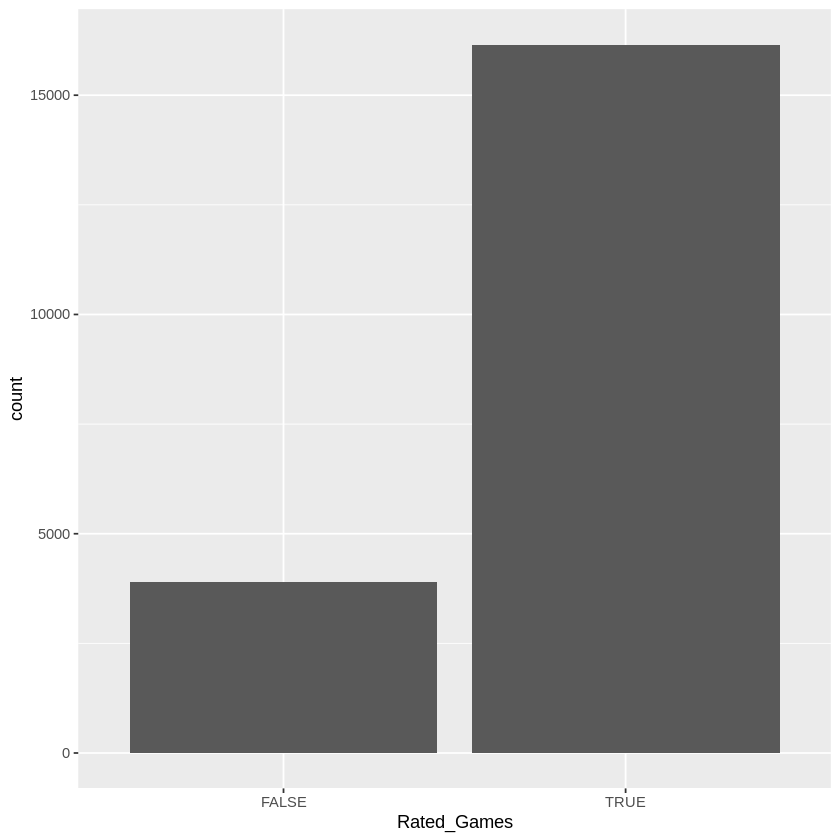

In [47]:
ggplot(data,aes(x=toupper(rated))) + geom_bar() + xlab(label = "Rated_Games") 
    + ylab(label="Frequency") + theme_light()

We can see that the majority of games on Lichess are rated games. 

Now we can take a look at the most popular openings. The decision on popular for now is where the opening occurs more than 100 times in the dataset

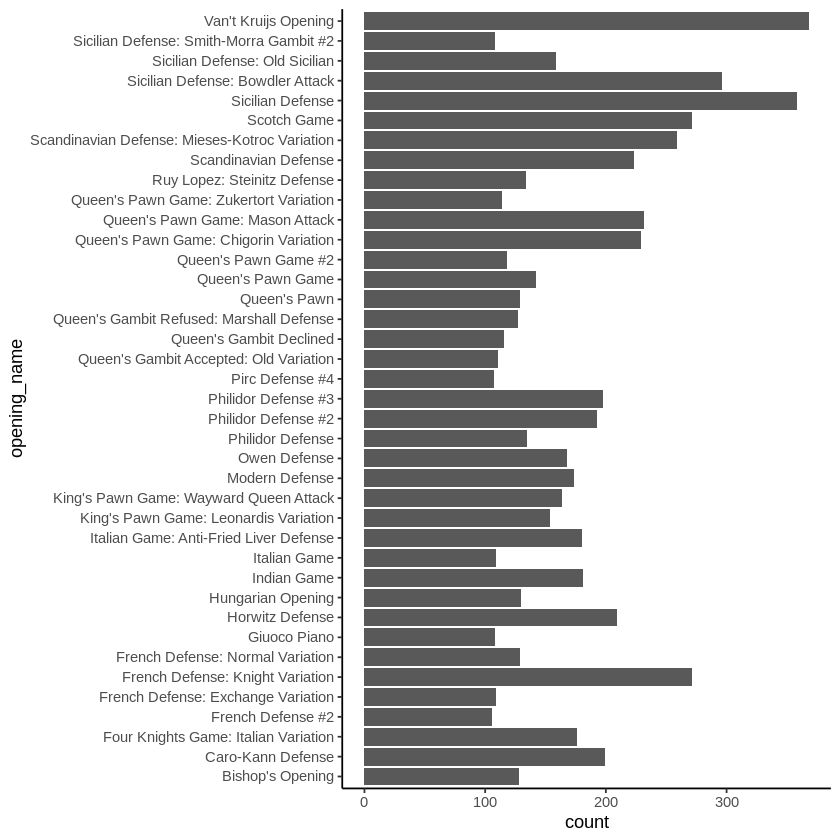

In [48]:
top_openings <- filter(summarise(group_by(data,opening_name), count=length(opening_name)), count>100)

ggplot(top_openings,aes(x=opening_name,y=count))+geom_col()+coord_flip()+theme_classic()

We can see a few things for this graph
- First: the `Van't Kruijs Opening` and the `Sicilian Defense` are very close in popularity
- Second: there are variations even within openings. For example, there are a number of `Queen's Pawn Game` listed.

When looking at the variatons within the openings, we have to ask, does this concern us? Is it better to replace all varations with the main name, by which I mean replace all version of the Queen's Pawn Game with simple `Queen's Pawn Game`. I may come back to this.

https://www.365chess.com/eco.php